<a href="https://colab.research.google.com/github/deshanchathusanka/optimisation/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Manual Selection

 Y = MX + C ( X = Predictor, Y = Predictand)

In [69]:
from google.colab import drive
import numpy as np
import sys
import time
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')
!ln -s "/content/drive/My Drive/Academic/CSCM 72 - Optimisation/Assignment/data"

Mounted at /content/drive


In [3]:
def mean_square_error(x, y, theta):
  m = theta[0]
  c = theta[1]

  y_hat = m*x + c
  error = y - y_hat
  mse = np.dot(error, error)

  return mse

In [4]:
theta = np.array([0.7, 1.9])
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

mse = mean_square_error(x, y, theta)
print(mse)

2.5


# 2. Grid Search Implementation

In [64]:
def grid_search(k, search_range, x, y):
  """
  k = (n, 1) = number of regular intervals
  range = (n, 2) = minimum and maximum of each dimension
  x = predictor
  y = predictand
  """
  n = len(k)
  theta_cmb = [None]*n

  for i in range(0, n):
    k_i = k[i]
    search_range_i = search_range[i]
    theta_i = np.linspace(*search_range_i, k_i)
    theta_cmb[i] = theta_i
  
  theta_cmb = np.array(np.meshgrid(*theta_cmb)).T.reshape(-1,n)
  no_cmb = len(theta_cmb)
  mse_cmb = [sys.maxsize]*no_cmb
  
  i = 0
  for theta in theta_cmb:
    mse = mean_square_error(x, y, theta)
    mse_cmb[i] = mse
    i = i + 1
  
  min_index = np.argmin(mse_cmb)
  optimal_selection = theta_cmb[min_index]
  min_mse = mse_cmb[min_index]
  
  return optimal_selection, min_mse

In [65]:
k = np.array([20, 20])
search_range = np.array([
    [0, 2],
    [0, 2]
])
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

optimal_selection, min_mse = grid_search(k, search_range, x, y)
print(optimal_selection)
print(min_mse)

[0.63157895 2.        ]
2.465373961218838


[0.00429559 0.00320658 0.00309444 0.00311082 0.00308396 0.00307126
 0.00304551 0.00306229 0.00306361 0.00360299 0.00308519 0.00297784
 0.00298425 0.00300062 0.00297985 0.00296971 0.00327809 0.00315159
 0.00302769 0.00305515 0.00307508 0.00307877 0.00308902 0.00307358
 0.0030589  0.00309704 0.00307876 0.00310772 0.00312665 0.00377117
 0.00322737 0.00303135 0.00300312 0.00300034 0.00304534 0.00303219
 0.00327644 0.00306886 0.00298715 0.00341311 0.0032698  0.00319937
 0.00308885 0.00298522 0.00296947 0.00296426 0.00300112 0.0033485
 0.00307116 0.00336811 0.00326849 0.00327433 0.00327778 0.00306968
 0.00310675 0.00335196 0.00306078 0.00304834 0.00311526 0.00319356
 0.00315008 0.00325083 0.00310034 0.00305444 0.0030819  0.00309049
 0.0030893  0.00305261 0.00304298 0.00322704 0.00314248 0.00306535
 0.00329591 0.00335001 0.00316098 0.00316184 0.00305987 0.00306211
 0.00303389 0.00303603 0.00308136 0.0030917  0.00352572 0.00322558
 0.00317913 0.00308326 0.00311726 0.0031012  0.0031534  0.00311

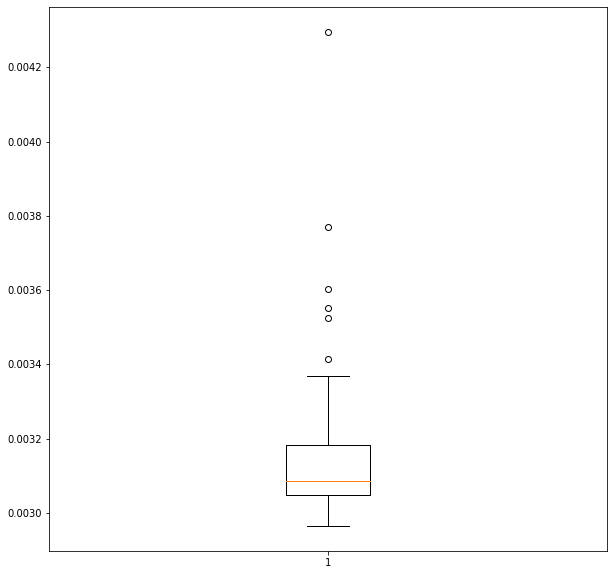

In [72]:
exe_time_np = np.zeros(100)
for i in range(0, 100):
  start = time.perf_counter()
  optimal_selection, min_mse = grid_search(k, search_range, x, y)
  end = time.perf_counter()

  exe_time = end - start
  exe_time_np[i] = exe_time


print(exe_time_np)

# Box plot represents minimum, first quartile, median, third quartile, maximum values.
fig = plt.figure(figsize=(10, 10))
plt.boxplot(exe_time_np)
plt.show()


# 3. Random Search Implementation

# 4. References

[1] https://builtin.com/data-science/boxplot